# Summaries, Conclusions, and Recommendations

Below, I'll lay out some of the summaries of my testing and provide some recommendations for investors looking to generate a return.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
lasso_coefs = pd.read_csv('../datasets/coefs/lasso_coefs.csv')
ridge_coefs = pd.read_csv('../datasets/coefs/ridge_coefs.csv')
linreg_coefs = pd.read_csv('../datasets/coefs/lr_coefs.csv')

### Summary of model scores

|            | **RMSE Score on Test Data (20% of original dataset)** | **RMSE Score on Kaggle Data** |
|------------|-----------------------------------------------------------|-------------------------------|
| **LinReg** |                 <center>17265.16</center>                 | <center>21166.21</center>     |
| **Ridge**  |                 <center>18031.37</center>                 | <center>21820.68</center>     |
| **Lasso**  |                 <center>18074.75</center>                 | <center>21619.87</center>     |

### Comparing Model Coefficients

In [3]:
def remove_uninterpretable_coefs(data):
    return data[(data['features'].str.contains(' x ') == False) &
                (data['features'].str.contains('log') == False) &
                (data['features'].str.contains('\^') == False)]

In [4]:
def rename_column_unnamed0_to_features(data):
    return data.rename(columns={'Unnamed: 0' : 'features', 'Coefficients' : 'coefficients'})

In [5]:
def sort_columns(data, by='coefficients'):
    return data.sort_values(by=by)

In [6]:
def coef_column_clean(data):
    data = rename_column_unnamed0_to_features(data)
    data = remove_uninterpretable_coefs(data)
    data = sort_columns(data)
    return data

In [7]:
lasso_coefs_clean = coef_column_clean(lasso_coefs)
ridge_coefs_clean = coef_column_clean(ridge_coefs)
linreg_coefs_clean = coef_column_clean(linreg_coefs)

In [8]:
linreg_coefs_clean

,features,coefficients
32,Neighborhood_NWAmes,-27373.482956
31,Neighborhood_NAmes,-22477.006367
26,Neighborhood_Edwards,-21611.569808
36,Neighborhood_Sawyer,-21119.850484
30,Neighborhood_Mitchel,-21034.236067
...,...,...
10,MS Zoning_FV,21729.193826
42,Roof Matl_WdShngl,22236.856400
57,Condition 1_PosA,23865.693726
53,Exter Qual_TA,27913.878321


In [9]:
# creating scaled linreg coefs
sc = StandardScaler()
scaled_linreg_coefs = sc.fit_transform(linreg_coefs_clean[['coefficients']])

In [10]:
# need new df for scaled coefficients
scaled_linreg_df = pd.DataFrame(linreg_coefs_clean[['features']])

In [11]:
# putting my scaled coefs into my new df
scaled_linreg_df['coefficients'] = scaled_linreg_coefs

### Creating a df of the top 5 highest positive and negative correlations

In [12]:
scaled_linreg_df = coef_column_clean(scaled_linreg_df)

In [13]:
lasso_best_worst = pd.concat([lasso_coefs_clean.head(), lasso_coefs_clean.tail()])

In [14]:
ridge_best_worst = pd.concat([ridge_coefs_clean.head(), ridge_coefs_clean.tail()])

In [15]:
linreg_best_worst = pd.concat([linreg_coefs_clean.head(), linreg_coefs_clean.tail()])

In [16]:
scaled_linreg_best_worst = pd.concat([scaled_linreg_df.head(), scaled_linreg_df.tail()])

In [25]:
def create_coef_plot(data, title, columns=['features', 'coefficients'], xlabel='Features', ylabel='Coefficient Values (in Dollars)', scale=[-35000, 35000]):
    plt.figure(figsize=(21,10))
    sns.set_style('darkgrid')
    sns.barplot(data[columns[0]], data[columns[1]], palette='RdBu')
    plt.ylim(scale[0], scale[1])
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=24)

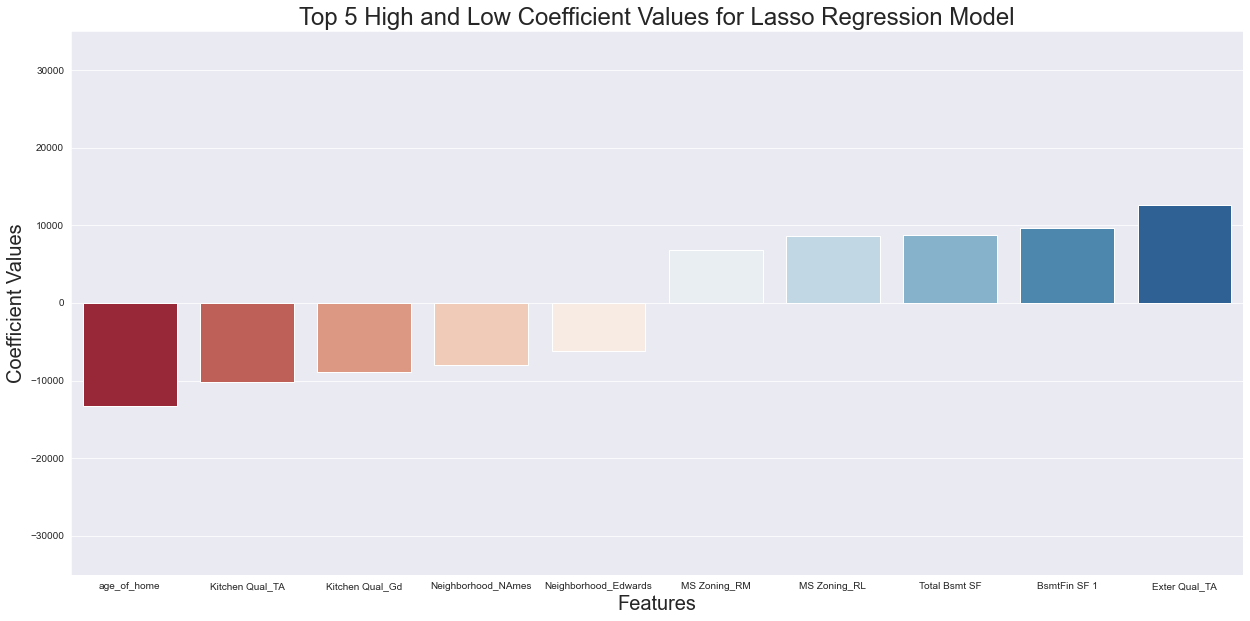

In [26]:
create_coef_plot(lasso_best_worst, 'Top 5 High and Low Coefficient Values for Lasso Regression Model')
plt.savefig('../images/coefs_lasso_reg');

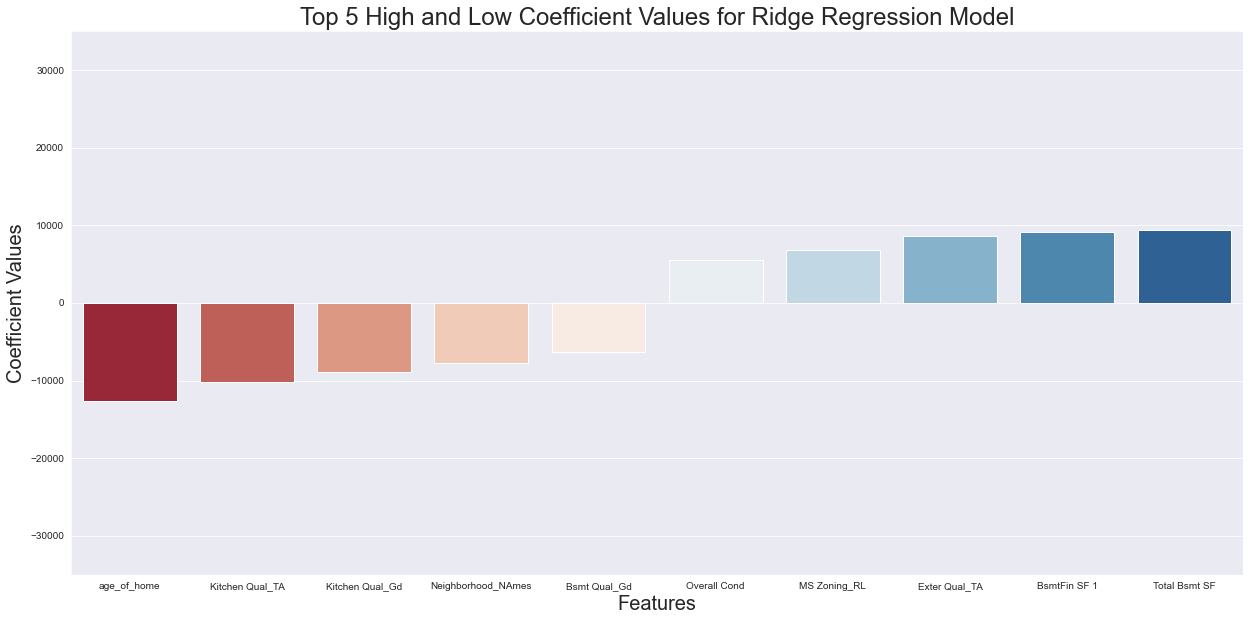

In [27]:
create_coef_plot(ridge_best_worst, 'Top 5 High and Low Coefficient Values for Ridge Regression Model')
plt.savefig('../images/coefs_ridge_reg');

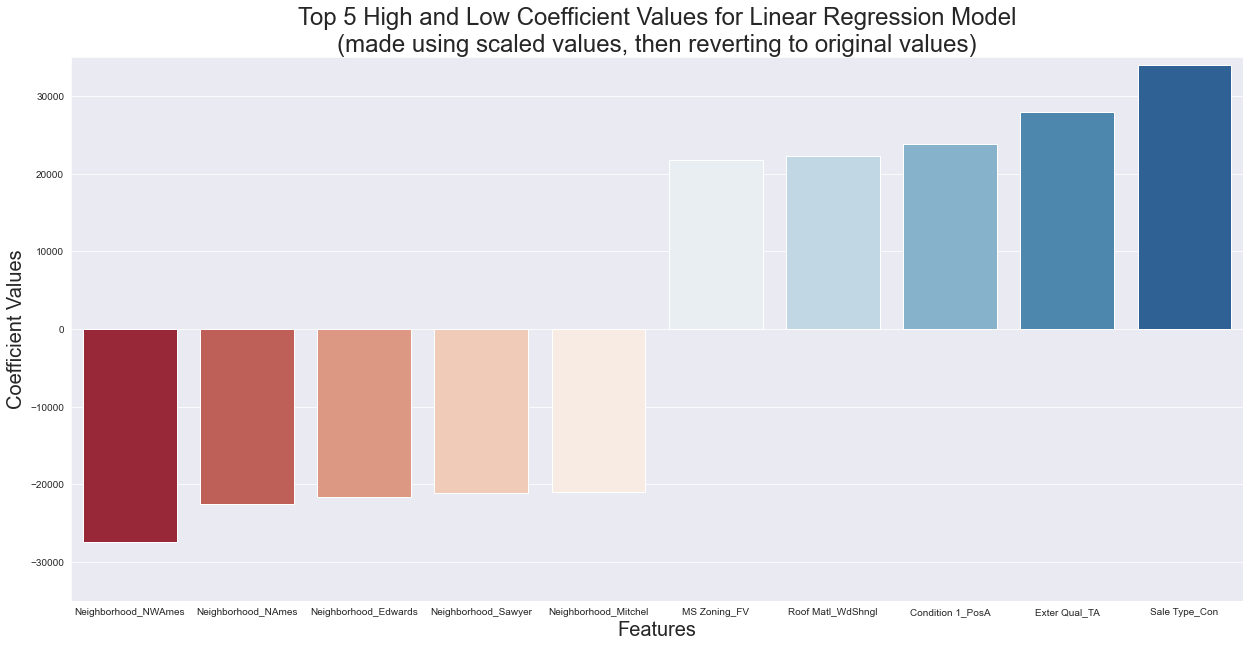

In [28]:
create_coef_plot(linreg_best_worst[scaled_linreg_best_worst.columns],
                 'Top 5 High and Low Coefficient Values for Linear Regression Model\n(made using scaled values, then reverting to original values)',
                 scale=[-35_000, 35_000],
                 columns=['features', 'coefficients'])
plt.savefig('../images/coefs_lin_reg');

---
After running all the tests on the data, I've come to the following conclusions about the **best ways to improve a home's value**:
* **Upgrade your roof material!** - when compared to standard composite shingles, Wood Shingles may add about 21000 dollars in value to your home when all other values are held constant
* **Remodel your kitchen!** When compared to a kitchen of Excellent quality, a good to poor kitchen may negatively impact your house value by 8,000-10,000 dollars when all other variables are equal.
* **Remodel your basement!** When compared to basements of Excellent quality, a Good to poor basement may negatively impact your house value by around 8,000 dollars when all other variables are held constant

You may be able to negotiate for lower purchasing prices in **Neighborhoods like**:
* Northwest Ames
* North Ames
* Edwards
* Sawyer
* Mitchell  

When compared to the same house in Bloomington Heights, being located in these neighborhoods may decrease the value of your home by 21000 or more.

And some conclusions about the **models I ran**:
* The Lasso model seemed to perform the most consistently, though the many interaction terms made the results difficult to interpret literally. I was able to detect trends across the three models that led me to my conclusions.
* A simpler model with less features would sacrifice my model's performance for the sake of a clearer, actionable understanding of the correlation of features to sale price